In [389]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [465]:
matchday_results = pd.read_csv("2023_matchday_results.csv",index_col=0)

In [466]:
matchday_results

,fixture.id,fixture.date,teams.home.id,teams.home.name,teams.home.winner,teams.away.id,teams.away.name,teams.away.winner,goals.home,goals.away
0,867946,2022-08-05T19:00:00+00:00,52,Crystal Palace,False,42,Arsenal,True,0,2
1,867947,2022-08-06T11:30:00+00:00,36,Fulham,NaN,40,Liverpool,NaN,2,2
2,867948,2022-08-06T14:00:00+00:00,35,Bournemouth,True,66,Aston Villa,False,2,0
3,867949,2022-08-06T14:00:00+00:00,63,Leeds,True,39,Wolves,False,2,1
4,867950,2022-08-07T13:00:00+00:00,46,Leicester,NaN,55,Brentford,NaN,2,2
...,...,...,...,...,...,...,...,...,...,...
375,868321,2023-05-28T15:30:00+00:00,45,Everton,True,35,Bournemouth,False,1,0
376,868322,2023-05-28T15:30:00+00:00,63,Leeds,False,47,Tottenham,True,1,4
377,868323,2023-05-28T15:30:00+00:00,46,Leicester,True,48,West Ham,False,2,1
378,868324,2023-05-28T15:30:00+00:00,33,Manchester United,True,36,Fulham,False,2,1


In [392]:
away_teams = pd.read_csv("2023_away_teams_stats.csv")

In [393]:
away_teams

,fixture id,away team id,away team name,Shots on Goal,Shots off Goal,Total Shots,Blocked Shots,Shots insidebox,Shots outsidebox,Fouls,Corner Kicks,Offsides,Ball Possession,Yellow Cards,Red Cards,Goalkeeper Saves,Total passes,Passes accurate,Passes %,expected_goals
0,867946,42.0,Arsenal,2.0,4.0,10,4.0,8.0,2.0,11,5.0,2.0,44%,2.0,NaN,2.0,438,360,82%,NaN
1,867947,40.0,Liverpool,4.0,5.0,11,2.0,9.0,2.0,9,4.0,4.0,67%,NaN,NaN,1.0,612,473,77%,NaN
2,867948,66.0,Aston Villa,2.0,7.0,15,6.0,4.0,11.0,16,5.0,4.0,66%,3.0,NaN,1.0,571,479,84%,NaN
3,867949,39.0,Wolves,6.0,6.0,15,3.0,8.0,7.0,9,4.0,1.0,60%,NaN,NaN,3.0,546,463,85%,NaN
4,867950,55.0,Brentford,3.0,4.0,8,1.0,5.0,3.0,5,6.0,2.0,45%,NaN,NaN,3.0,457,386,84%,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,868321,35.0,Bournemouth,2.0,3.0,7,2.0,4.0,3.0,12,3.0,1.0,62%,3.0,NaN,5.0,533,447,84%,0.47
376,868322,47.0,Tottenham,7.0,3.0,11,1.0,10.0,1.0,5,3.0,1.0,48%,NaN,NaN,1.0,437,341,78%,2.17
377,868323,48.0,West Ham,3.0,9.0,16,4.0,12.0,4.0,10,5.0,3.0,52%,1.0,NaN,2.0,565,501,89%,1.38
378,868324,36.0,Fulham,3.0,6.0,10,1.0,6.0,4.0,10,4.0,1.0,47%,2.0,NaN,6.0,426,358,84%,1.80


In [394]:
home_teams = pd.read_csv("2023_home_teams_stats.csv")

In [395]:
home_teams

,fixture id,Home team id,Home team name,Shots on Goal,Shots off Goal,Total Shots,Blocked Shots,Shots insidebox,Shots outsidebox,Fouls,Corner Kicks,Offsides,Ball Possession,Yellow Cards,Red Cards,Goalkeeper Saves,Total passes,Passes accurate,Passes %,expected_goals
0,867946,52,Crystal Palace,2.0,2.0,10,6.0,9.0,1.0,16,3.0,1.0,56%,1.0,NaN,1.0,562,487,87%,NaN
1,867947,36,Fulham,3.0,2.0,9,4.0,7.0,2.0,7,4.0,4.0,33%,2.0,NaN,1.0,294,181,62%,NaN
2,867948,35,Bournemouth,3.0,2.0,7,2.0,6.0,1.0,18,5.0,1.0,34%,3.0,NaN,2.0,301,211,70%,NaN
3,867949,63,Leeds,4.0,5.0,12,3.0,7.0,5.0,13,6.0,NaN,40%,2.0,NaN,5.0,355,269,76%,NaN
4,867950,46,Leicester,5.0,6.0,14,3.0,5.0,9.0,6,5.0,2.0,55%,NaN,NaN,1.0,580,510,88%,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,868321,45,Everton,6.0,5.0,13,2.0,8.0,5.0,11,9.0,NaN,38%,1.0,NaN,1.0,305,223,73%,1.04
376,868322,63,Leeds,2.0,7.0,19,10.0,14.0,5.0,8,12.0,1.0,52%,3.0,NaN,3.0,441,341,77%,1.50
377,868323,46,Leicester,4.0,6.0,13,3.0,8.0,5.0,8,3.0,2.0,48%,1.0,NaN,2.0,541,475,88%,1.42
378,868324,33,Manchester United,8.0,7.0,21,6.0,12.0,9.0,14,5.0,1.0,53%,1.0,NaN,2.0,493,415,84%,2.89


In [396]:
final_standings = pd.read_csv("2023_PL_standings.csv")

In [397]:
final_standings

,rank,points,goalsDiff,team_id,team.name,matches_played,wins,draws,losses,goals_for,...,home_draw,home_lose,home_goals_for,home_goals_against,away,away_wins,away_draw,away_lose,away_goals_for,away_goals_against
0,1,89,61,50,Manchester City,38,28,5,5,94,...,1,1,60,17,19,11,4,4,34,16
1,2,84,45,42,Arsenal,38,26,6,6,88,...,3,2,53,25,19,12,3,4,35,18
2,3,75,15,33,Manchester United,38,23,6,9,58,...,3,1,36,10,19,8,3,8,22,33
3,4,71,35,34,Newcastle,38,19,14,5,68,...,6,2,36,14,19,8,8,3,32,19
4,5,67,28,40,Liverpool,38,19,10,9,75,...,5,1,46,17,19,6,5,8,29,30
5,6,62,19,51,Brighton,38,18,8,12,72,...,4,5,37,21,19,8,4,7,35,32
6,7,61,5,66,Aston Villa,38,18,7,13,51,...,2,5,33,21,19,6,5,8,18,25
7,8,60,7,47,Tottenham,38,18,6,14,70,...,1,6,37,25,19,6,5,8,33,38
8,9,59,12,55,Brentford,38,15,14,9,58,...,7,2,35,18,19,5,7,7,23,28
9,10,52,2,36,Fulham,38,15,7,16,55,...,5,6,31,29,19,7,2,10,24,24


Q1) Overall Performance:

Which teams finished in the top 4, and what were their respective points?
Which teams were relegated, and what were their final standings and points?

In [398]:
top_4 = final_standings[['team.name','points']].head(4)

In [399]:
top_4

,team.name,points
0,Manchester City,89
1,Arsenal,84
2,Manchester United,75
3,Newcastle,71


In [400]:
relegated_teams = final_standings[['team.name','points']].tail(3)

In [401]:
relegated_teams

,team.name,points
17,Leicester,34
18,Leeds,31
19,Southampton,25


Q2) Home vs. Away Performance:

Did teams perform better at home or away?
Compare home and away statistics such as goals scored,total wins and points earned.
Plot the average goals scored by home and away teams throughout the season.

In [402]:
matchday_results

,fixture.id,fixture.date,teams.home.id,teams.home.name,teams.home.winner,teams.away.id,teams.away.name,teams.away.winner,goals.home,goals.away
0,867946,2022-08-05T19:00:00+00:00,52,Crystal Palace,False,42,Arsenal,True,0,2
1,867947,2022-08-06T11:30:00+00:00,36,Fulham,NaN,40,Liverpool,NaN,2,2
2,867948,2022-08-06T14:00:00+00:00,35,Bournemouth,True,66,Aston Villa,False,2,0
3,867949,2022-08-06T14:00:00+00:00,63,Leeds,True,39,Wolves,False,2,1
4,867950,2022-08-07T13:00:00+00:00,46,Leicester,NaN,55,Brentford,NaN,2,2
...,...,...,...,...,...,...,...,...,...,...
375,868321,2023-05-28T15:30:00+00:00,45,Everton,True,35,Bournemouth,False,1,0
376,868322,2023-05-28T15:30:00+00:00,63,Leeds,False,47,Tottenham,True,1,4
377,868323,2023-05-28T15:30:00+00:00,46,Leicester,True,48,West Ham,False,2,1
378,868324,2023-05-28T15:30:00+00:00,33,Manchester United,True,36,Fulham,False,2,1


In [403]:
away_goals_average = matchday_results['goals.away'].mean()

In [404]:
home_goals_average = matchday_results['goals.home'].mean()

In [405]:
matchday_results['goals.away'].sum()

463

In [406]:
matchday_results['goals.home'].sum()

621

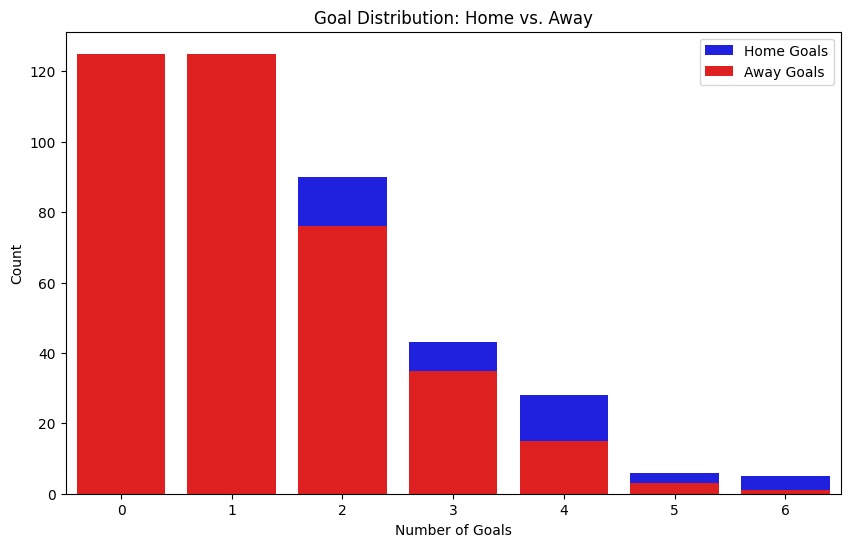

In [407]:

sns.countplot(x='goals.home', data=matchday_results, color='blue', label='Home Goals')
sns.countplot(x='goals.away', data=matchday_results, color='red', label='Away Goals')
plt.xlabel('Number of Goals')
plt.ylabel('Count')
plt.title('Goal Distribution: Home vs. Away')
plt.legend()

Text(0.5, 1.0, 'Average Goals Scored: Home vs. Away')

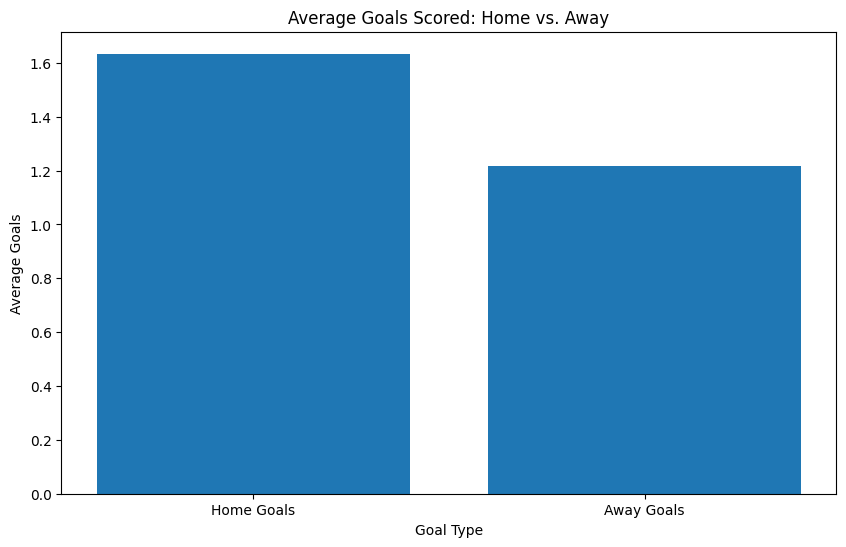

In [408]:
x= ['Home Goals','Away Goals']
y= [home_goals_average,away_goals_average]

plt.bar(x, y)
plt.xlabel('Goal Type')
plt.ylabel('Average Goals')
plt.title('Average Goals Scored: Home vs. Away')


Teams Performed better at Home, Since they scored more goals at Home on average
 


In [409]:
home_wins = matchday_results['teams.home.winner']==True

In [410]:
home_wins_sum = home_wins.sum()

In [411]:
away_wins = matchday_results['teams.away.winner']==True

In [412]:
away_wins_sum = away_wins.sum()

<Axes: >

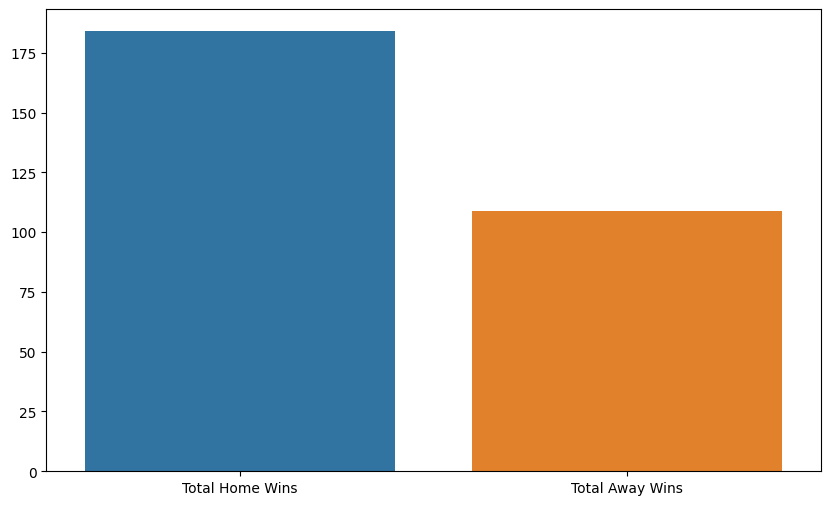

In [413]:
x=['Total Home Wins','Total Away Wins']
y = [home_wins_sum,away_wins_sum]
sns.barplot(x=x,y=y)

Teams won more at Home rather than away


In [414]:
home_goals_scored = final_standings['home_goals_for']

In [415]:
home_goals_scored_total = home_goals_scored.sum()

In [416]:
home_goals_conceeded = final_standings['home_goals_against']

In [417]:
home_goals_conceeded_total = home_goals_conceeded.sum()

<Axes: >

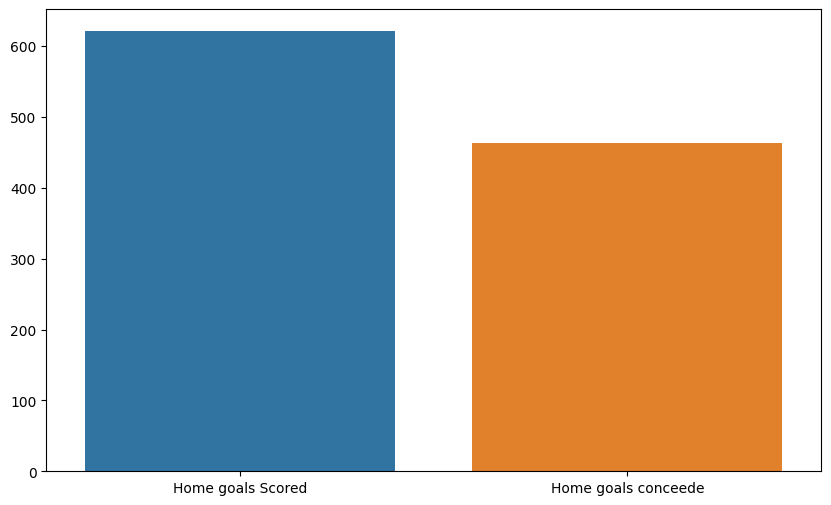

In [418]:
x=['Home goals Scored','Home goals conceede']
y = [home_goals_scored_total,home_goals_conceeded_total]
sns.barplot(x=x,y=y)

Goal Distribution:

Which teams scored the most goals and which teams conceded the fewest goals?
Create a stacked bar chart to visualize the distribution of goals scored by each team throughout the season.

In [419]:
final_standings

,rank,points,goalsDiff,team_id,team.name,matches_played,wins,draws,losses,goals_for,...,home_draw,home_lose,home_goals_for,home_goals_against,away,away_wins,away_draw,away_lose,away_goals_for,away_goals_against
0,1,89,61,50,Manchester City,38,28,5,5,94,...,1,1,60,17,19,11,4,4,34,16
1,2,84,45,42,Arsenal,38,26,6,6,88,...,3,2,53,25,19,12,3,4,35,18
2,3,75,15,33,Manchester United,38,23,6,9,58,...,3,1,36,10,19,8,3,8,22,33
3,4,71,35,34,Newcastle,38,19,14,5,68,...,6,2,36,14,19,8,8,3,32,19
4,5,67,28,40,Liverpool,38,19,10,9,75,...,5,1,46,17,19,6,5,8,29,30
5,6,62,19,51,Brighton,38,18,8,12,72,...,4,5,37,21,19,8,4,7,35,32
6,7,61,5,66,Aston Villa,38,18,7,13,51,...,2,5,33,21,19,6,5,8,18,25
7,8,60,7,47,Tottenham,38,18,6,14,70,...,1,6,37,25,19,6,5,8,33,38
8,9,59,12,55,Brentford,38,15,14,9,58,...,7,2,35,18,19,5,7,7,23,28
9,10,52,2,36,Fulham,38,15,7,16,55,...,5,6,31,29,19,7,2,10,24,24


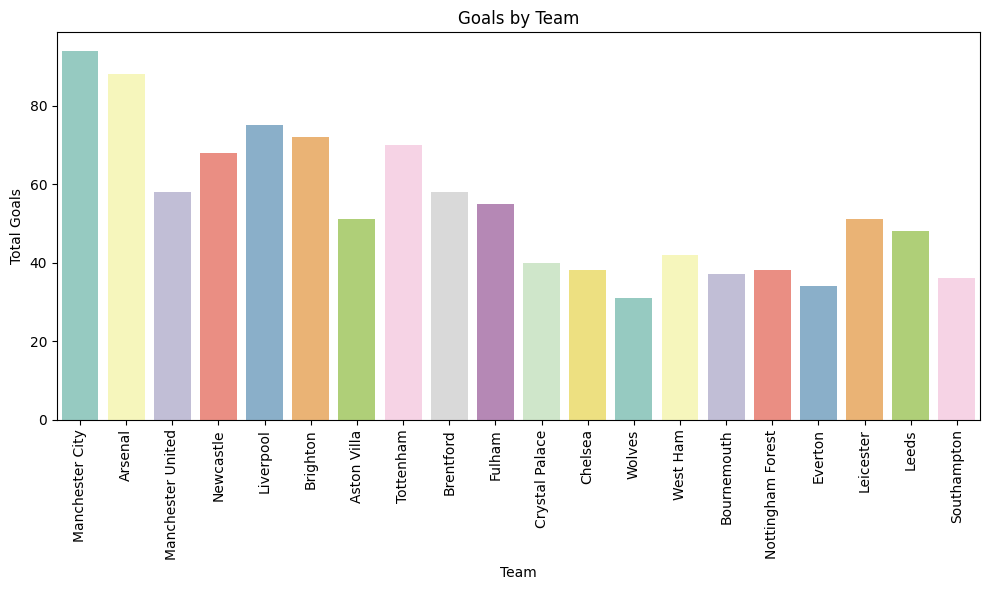

In [420]:
sns.barplot(x='team.name', y='goals_for', data=final_standings,palette='Set3')

plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Total Goals')
plt.title('Goals by Team')
plt.tight_layout()

Manchester City Scored The most goals and Wolves scored the least goals


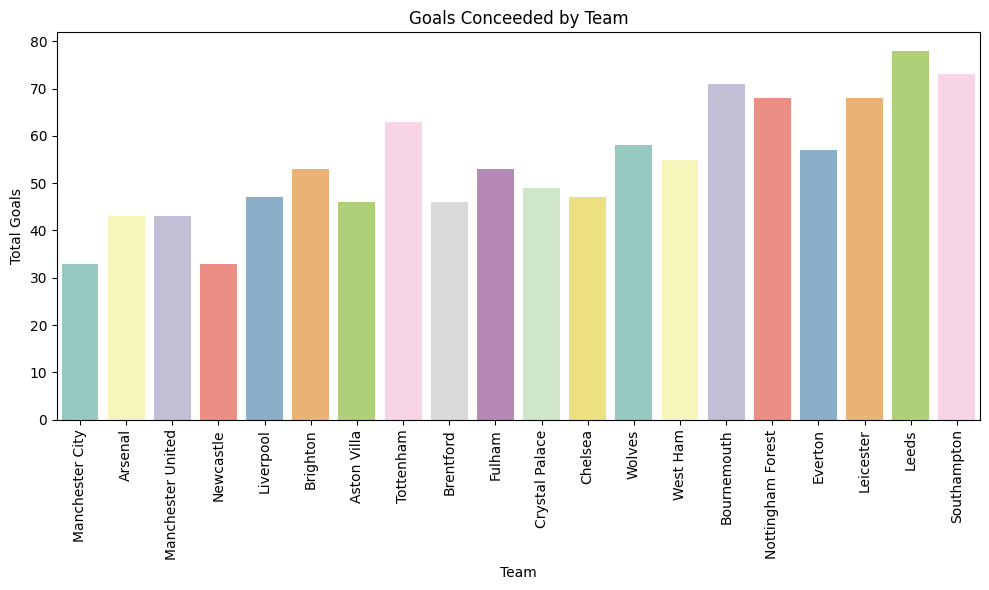

In [421]:
sns.barplot(x='team.name', y='goals_against', data=final_standings,palette='Set3')

plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Total Goals')
plt.title('Goals Conceeded by Team')
plt.tight_layout()

Leeds Conceeded the most goals, Manchester City Conceeded the least Goals


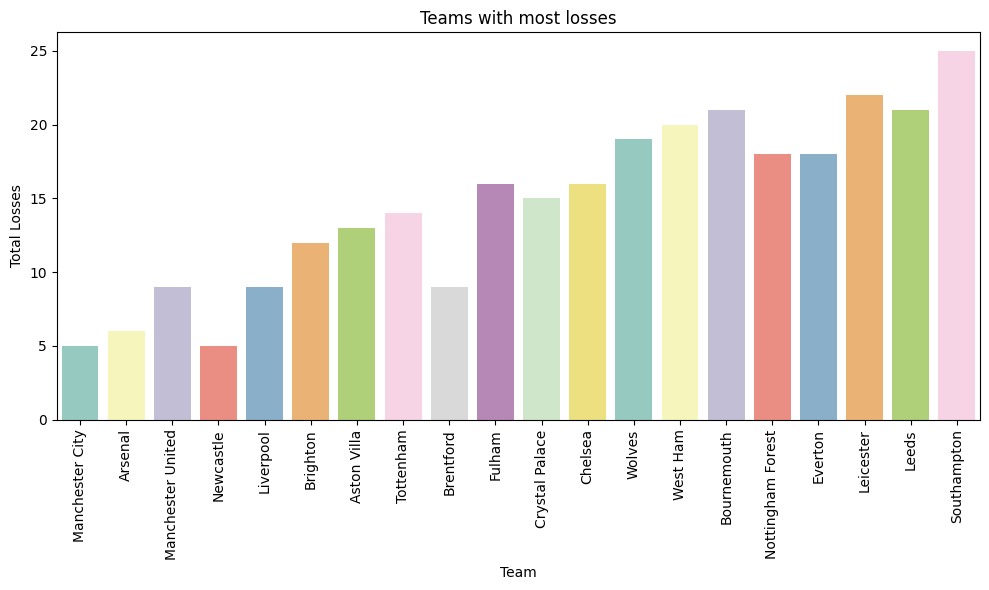

In [422]:
sns.barplot(x='team.name', y='losses', data=final_standings,palette='Set3')

plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Total Losses')
plt.title('Teams with most losses')
plt.tight_layout()

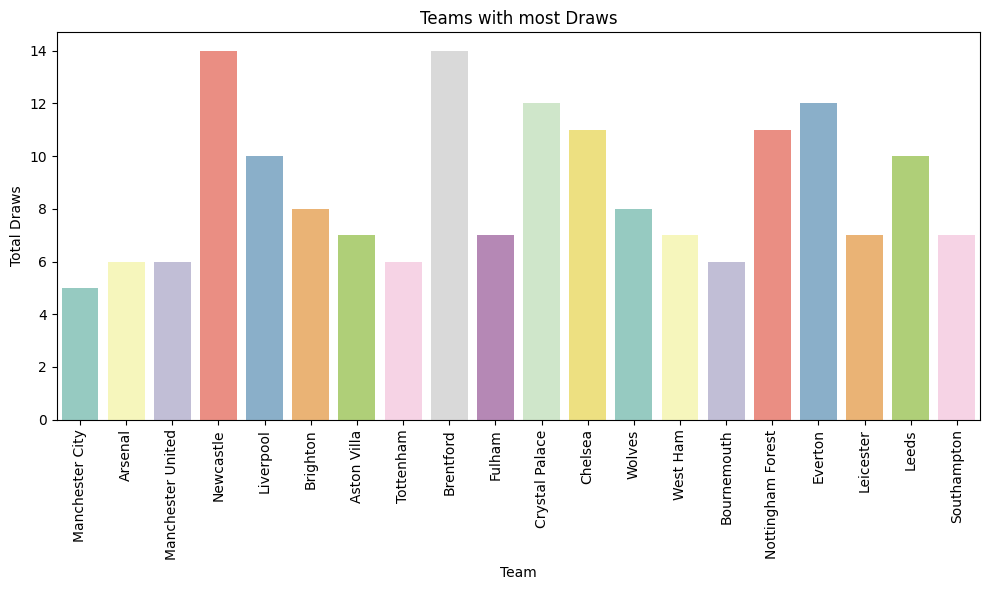

In [423]:
sns.barplot(x='team.name', y='draws', data=final_standings,palette='Set3')

plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Total Draws')
plt.title('Teams with most Draws')
plt.tight_layout()

In [424]:
home_teams

,fixture id,Home team id,Home team name,Shots on Goal,Shots off Goal,Total Shots,Blocked Shots,Shots insidebox,Shots outsidebox,Fouls,Corner Kicks,Offsides,Ball Possession,Yellow Cards,Red Cards,Goalkeeper Saves,Total passes,Passes accurate,Passes %,expected_goals
0,867946,52,Crystal Palace,2.0,2.0,10,6.0,9.0,1.0,16,3.0,1.0,56%,1.0,NaN,1.0,562,487,87%,NaN
1,867947,36,Fulham,3.0,2.0,9,4.0,7.0,2.0,7,4.0,4.0,33%,2.0,NaN,1.0,294,181,62%,NaN
2,867948,35,Bournemouth,3.0,2.0,7,2.0,6.0,1.0,18,5.0,1.0,34%,3.0,NaN,2.0,301,211,70%,NaN
3,867949,63,Leeds,4.0,5.0,12,3.0,7.0,5.0,13,6.0,NaN,40%,2.0,NaN,5.0,355,269,76%,NaN
4,867950,46,Leicester,5.0,6.0,14,3.0,5.0,9.0,6,5.0,2.0,55%,NaN,NaN,1.0,580,510,88%,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,868321,45,Everton,6.0,5.0,13,2.0,8.0,5.0,11,9.0,NaN,38%,1.0,NaN,1.0,305,223,73%,1.04
376,868322,63,Leeds,2.0,7.0,19,10.0,14.0,5.0,8,12.0,1.0,52%,3.0,NaN,3.0,441,341,77%,1.50
377,868323,46,Leicester,4.0,6.0,13,3.0,8.0,5.0,8,3.0,2.0,48%,1.0,NaN,2.0,541,475,88%,1.42
378,868324,33,Manchester United,8.0,7.0,21,6.0,12.0,9.0,14,5.0,1.0,53%,1.0,NaN,2.0,493,415,84%,2.89


In [425]:
away_teams

,fixture id,away team id,away team name,Shots on Goal,Shots off Goal,Total Shots,Blocked Shots,Shots insidebox,Shots outsidebox,Fouls,Corner Kicks,Offsides,Ball Possession,Yellow Cards,Red Cards,Goalkeeper Saves,Total passes,Passes accurate,Passes %,expected_goals
0,867946,42.0,Arsenal,2.0,4.0,10,4.0,8.0,2.0,11,5.0,2.0,44%,2.0,NaN,2.0,438,360,82%,NaN
1,867947,40.0,Liverpool,4.0,5.0,11,2.0,9.0,2.0,9,4.0,4.0,67%,NaN,NaN,1.0,612,473,77%,NaN
2,867948,66.0,Aston Villa,2.0,7.0,15,6.0,4.0,11.0,16,5.0,4.0,66%,3.0,NaN,1.0,571,479,84%,NaN
3,867949,39.0,Wolves,6.0,6.0,15,3.0,8.0,7.0,9,4.0,1.0,60%,NaN,NaN,3.0,546,463,85%,NaN
4,867950,55.0,Brentford,3.0,4.0,8,1.0,5.0,3.0,5,6.0,2.0,45%,NaN,NaN,3.0,457,386,84%,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,868321,35.0,Bournemouth,2.0,3.0,7,2.0,4.0,3.0,12,3.0,1.0,62%,3.0,NaN,5.0,533,447,84%,0.47
376,868322,47.0,Tottenham,7.0,3.0,11,1.0,10.0,1.0,5,3.0,1.0,48%,NaN,NaN,1.0,437,341,78%,2.17
377,868323,48.0,West Ham,3.0,9.0,16,4.0,12.0,4.0,10,5.0,3.0,52%,1.0,NaN,2.0,565,501,89%,1.38
378,868324,36.0,Fulham,3.0,6.0,10,1.0,6.0,4.0,10,4.0,1.0,47%,2.0,NaN,6.0,426,358,84%,1.80


/var/folders/6y/5tj5rq797sv8pyy962f3rg040000gn/T/ipykernel_94814/1457577599.py:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




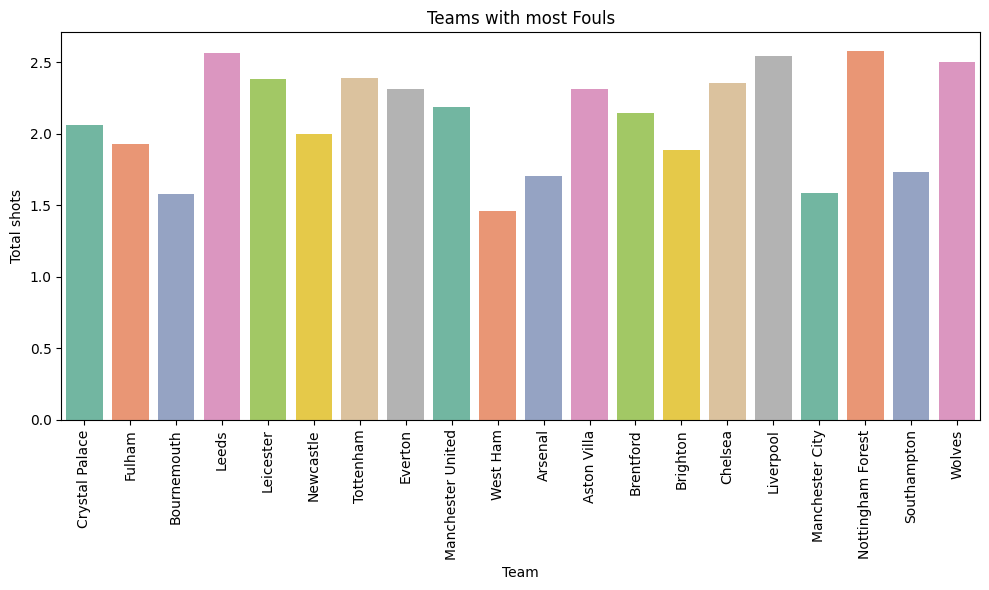

In [426]:
sns.barplot(x='Home team name', y='Yellow Cards', data=home_teams,palette='Set2',ci=None)

plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Total shots')
plt.title('Teams with most Fouls')
plt.tight_layout()

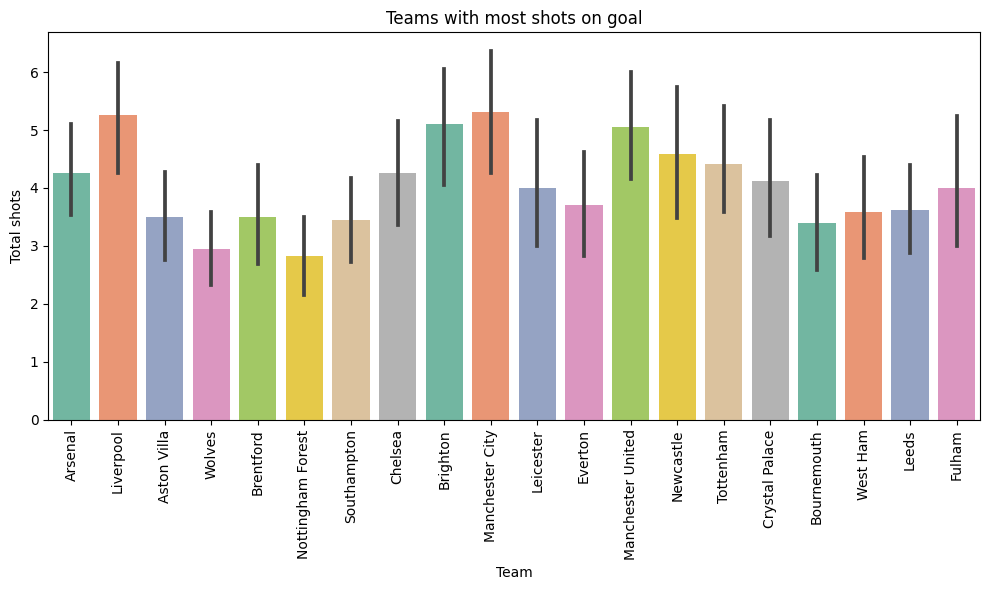

In [427]:
sns.barplot(x='away team name', y='Shots on Goal', data=away_teams,palette='Set2')

plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Total shots')
plt.title('Teams with most shots on goal')
plt.tight_layout()

Now i will combine the home and away teams stats on fixure ID, to get better insights


In [428]:

home_away_merged_df = pd.merge(home_teams, away_teams, on='fixture id', suffixes=('_home', '_away'))


In [429]:
home_away_merged_df

,fixture id,Home team id,Home team name,Shots on Goal_home,Shots off Goal_home,Total Shots_home,Blocked Shots_home,Shots insidebox_home,Shots outsidebox_home,Fouls_home,...,Corner Kicks_away,Offsides_away,Ball Possession_away,Yellow Cards_away,Red Cards_away,Goalkeeper Saves_away,Total passes_away,Passes accurate_away,Passes %_away,expected_goals_away
0,867946,52,Crystal Palace,2.0,2.0,10,6.0,9.0,1.0,16,...,5.0,2.0,44%,2.0,NaN,2.0,438,360,82%,NaN
1,867947,36,Fulham,3.0,2.0,9,4.0,7.0,2.0,7,...,4.0,4.0,67%,NaN,NaN,1.0,612,473,77%,NaN
2,867948,35,Bournemouth,3.0,2.0,7,2.0,6.0,1.0,18,...,5.0,4.0,66%,3.0,NaN,1.0,571,479,84%,NaN
3,867949,63,Leeds,4.0,5.0,12,3.0,7.0,5.0,13,...,4.0,1.0,60%,NaN,NaN,3.0,546,463,85%,NaN
4,867950,46,Leicester,5.0,6.0,14,3.0,5.0,9.0,6,...,6.0,2.0,45%,NaN,NaN,3.0,457,386,84%,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,868321,45,Everton,6.0,5.0,13,2.0,8.0,5.0,11,...,3.0,1.0,62%,3.0,NaN,5.0,533,447,84%,0.47
376,868322,63,Leeds,2.0,7.0,19,10.0,14.0,5.0,8,...,3.0,1.0,48%,NaN,NaN,1.0,437,341,78%,2.17
377,868323,46,Leicester,4.0,6.0,13,3.0,8.0,5.0,8,...,5.0,3.0,52%,1.0,NaN,2.0,565,501,89%,1.38
378,868324,33,Manchester United,8.0,7.0,21,6.0,12.0,9.0,14,...,4.0,1.0,47%,2.0,NaN,6.0,426,358,84%,1.80


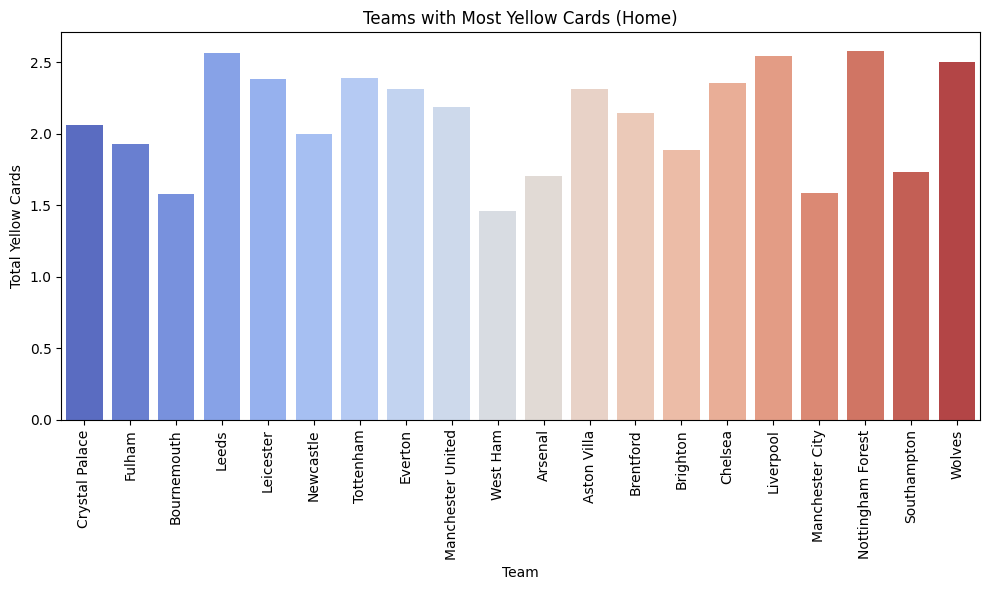

In [430]:

import matplotlib
sns.barplot(x='Home team name', y='Yellow Cards_home', data=home_away_merged_df, palette='coolwarm', errorbar=None,)
matplotlib.rcParams['figure.figsize'] = (10, 6)

plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Total Yellow Cards')
plt.title('Teams with Most Yellow Cards (Home)')
plt.tight_layout()
plt.show()


Since Arsenal bottledthe league, lets try to figure out where they messed up

In [431]:
arsenal_matches = matchday_results[(matchday_results['teams.home.name']=='Arsenal') | (matchday_results['teams.away.name']=='Arsenal')]

In [432]:
arsenal_matches

,fixture.id,fixture.date,teams.home.id,teams.home.name,teams.home.winner,teams.away.id,teams.away.name,teams.away.winner,goals.home,goals.away
0,867946,2022-08-05T19:00:00+00:00,52,Crystal Palace,False,42,Arsenal,True,0,2
10,867956,2022-08-13T14:00:00+00:00,42,Arsenal,True,46,Leicester,False,4,2
20,867966,2022-08-20T16:30:00+00:00,35,Bournemouth,False,42,Arsenal,True,0,3
30,867976,2022-08-27T16:30:00+00:00,42,Arsenal,True,36,Fulham,False,2,1
41,867987,2022-08-31T18:30:00+00:00,42,Arsenal,True,66,Aston Villa,False,2,1
55,868001,2022-09-04T15:30:00+00:00,33,Manchester United,True,42,Arsenal,False,3,1
61,868007,2023-03-01T19:45:00+00:00,42,Arsenal,True,45,Everton,False,4,0
71,868017,2022-09-18T11:00:00+00:00,55,Brentford,False,42,Arsenal,True,0,3
81,868027,2022-10-01T11:30:00+00:00,42,Arsenal,True,47,Tottenham,False,3,1
91,868037,2022-10-09T15:30:00+00:00,42,Arsenal,True,40,Liverpool,False,3,2


In [433]:
home_away_merged_df = home_away_merged_df.rename(columns={'fixture id':'fixture.id'})

In [434]:
home_away_merged_df

,fixture.id,Home team id,Home team name,Shots on Goal_home,Shots off Goal_home,Total Shots_home,Blocked Shots_home,Shots insidebox_home,Shots outsidebox_home,Fouls_home,...,Corner Kicks_away,Offsides_away,Ball Possession_away,Yellow Cards_away,Red Cards_away,Goalkeeper Saves_away,Total passes_away,Passes accurate_away,Passes %_away,expected_goals_away
0,867946,52,Crystal Palace,2.0,2.0,10,6.0,9.0,1.0,16,...,5.0,2.0,44%,2.0,NaN,2.0,438,360,82%,NaN
1,867947,36,Fulham,3.0,2.0,9,4.0,7.0,2.0,7,...,4.0,4.0,67%,NaN,NaN,1.0,612,473,77%,NaN
2,867948,35,Bournemouth,3.0,2.0,7,2.0,6.0,1.0,18,...,5.0,4.0,66%,3.0,NaN,1.0,571,479,84%,NaN
3,867949,63,Leeds,4.0,5.0,12,3.0,7.0,5.0,13,...,4.0,1.0,60%,NaN,NaN,3.0,546,463,85%,NaN
4,867950,46,Leicester,5.0,6.0,14,3.0,5.0,9.0,6,...,6.0,2.0,45%,NaN,NaN,3.0,457,386,84%,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,868321,45,Everton,6.0,5.0,13,2.0,8.0,5.0,11,...,3.0,1.0,62%,3.0,NaN,5.0,533,447,84%,0.47
376,868322,63,Leeds,2.0,7.0,19,10.0,14.0,5.0,8,...,3.0,1.0,48%,NaN,NaN,1.0,437,341,78%,2.17
377,868323,46,Leicester,4.0,6.0,13,3.0,8.0,5.0,8,...,5.0,3.0,52%,1.0,NaN,2.0,565,501,89%,1.38
378,868324,33,Manchester United,8.0,7.0,21,6.0,12.0,9.0,14,...,4.0,1.0,47%,2.0,NaN,6.0,426,358,84%,1.80


In [435]:
arsenal_matches_stats = pd.merge(arsenal_matches, home_away_merged_df, on='fixture.id', suffixes=('_home', '_away'))


In [436]:
arsenal_matches_stats

,fixture.id,fixture.date,teams.home.id,teams.home.name,teams.home.winner,teams.away.id,teams.away.name,teams.away.winner,goals.home,goals.away,...,Corner Kicks_away,Offsides_away,Ball Possession_away,Yellow Cards_away,Red Cards_away,Goalkeeper Saves_away,Total passes_away,Passes accurate_away,Passes %_away,expected_goals_away
0,867946,2022-08-05T19:00:00+00:00,52,Crystal Palace,False,42,Arsenal,True,0,2,...,5.0,2.0,44%,2.0,NaN,2.0,438,360,82%,NaN
1,867956,2022-08-13T14:00:00+00:00,42,Arsenal,True,46,Leicester,False,4,2,...,2.0,3.0,50%,1.0,NaN,4.0,472,383,81%,NaN
2,867966,2022-08-20T16:30:00+00:00,35,Bournemouth,False,42,Arsenal,True,0,3,...,4.0,3.0,58%,1.0,NaN,1.0,580,517,89%,NaN
3,867976,2022-08-27T16:30:00+00:00,42,Arsenal,True,36,Fulham,False,2,1,...,2.0,NaN,28%,3.0,NaN,6.0,223,138,62%,NaN
4,867987,2022-08-31T18:30:00+00:00,42,Arsenal,True,66,Aston Villa,False,2,1,...,3.0,1.0,41%,3.0,NaN,6.0,352,271,77%,NaN
5,868001,2022-09-04T15:30:00+00:00,33,Manchester United,True,42,Arsenal,False,3,1,...,5.0,NaN,60%,3.0,NaN,3.0,465,388,83%,NaN
6,868007,2023-03-01T19:45:00+00:00,42,Arsenal,True,45,Everton,False,4,0,...,1.0,2.0,27%,2.0,NaN,1.0,274,185,68%,1.17
7,868017,2022-09-18T11:00:00+00:00,55,Brentford,False,42,Arsenal,True,0,3,...,3.0,1.0,64%,2.0,NaN,2.0,592,509,86%,NaN
8,868027,2022-10-01T11:30:00+00:00,42,Arsenal,True,47,Tottenham,False,3,1,...,2.0,3.0,35%,1.0,1.0,6.0,307,240,78%,NaN
9,868037,2022-10-09T15:30:00+00:00,42,Arsenal,True,40,Liverpool,False,3,2,...,3.0,6.0,56%,2.0,NaN,4.0,488,395,81%,NaN


In [437]:
arsenal_matches_stats.columns

Index(['fixture.id', 'fixture.date', 'teams.home.id', 'teams.home.name',
       'teams.home.winner', 'teams.away.id', 'teams.away.name',
       'teams.away.winner', 'goals.home', 'goals.away', 'Home team id',
       'Home team name', 'Shots on Goal_home', 'Shots off Goal_home',
       'Total Shots_home', 'Blocked Shots_home', 'Shots insidebox_home',
       'Shots outsidebox_home', 'Fouls_home', 'Corner Kicks_home',
       'Offsides_home', 'Ball Possession_home', 'Yellow Cards_home',
       'Red Cards_home', 'Goalkeeper Saves_home', 'Total passes_home',
       'Passes accurate_home', 'Passes %_home', 'expected_goals_home',
       'away team id', 'away team name', 'Shots on Goal_away',
       'Shots off Goal_away', 'Total Shots_away', 'Blocked Shots_away',
       'Shots insidebox_away', 'Shots outsidebox_away', 'Fouls_away',
       'Corner Kicks_away', 'Offsides_away', 'Ball Possession_away',
       'Yellow Cards_away', 'Red Cards_away', 'Goalkeeper Saves_away',
       'Total passes_away

In [438]:
arsenal_matches_stats.drop(columns=['Home team id','Home team name','away team id','away team name'],inplace=True)

In [439]:
arsenal_matches_stats.drop(columns=['Shots off Goal_home','Blocked Shots_home', 'Shots insidebox_home',
       'Shots outsidebox_home','Shots off Goal_away','Blocked Shots_away', 'Shots insidebox_away', 'Shots outsidebox_away'],inplace=True)

In [440]:
arsenal_matches_stats

,fixture.id,fixture.date,teams.home.id,teams.home.name,teams.home.winner,teams.away.id,teams.away.name,teams.away.winner,goals.home,goals.away,...,Corner Kicks_away,Offsides_away,Ball Possession_away,Yellow Cards_away,Red Cards_away,Goalkeeper Saves_away,Total passes_away,Passes accurate_away,Passes %_away,expected_goals_away
0,867946,2022-08-05T19:00:00+00:00,52,Crystal Palace,False,42,Arsenal,True,0,2,...,5.0,2.0,44%,2.0,NaN,2.0,438,360,82%,NaN
1,867956,2022-08-13T14:00:00+00:00,42,Arsenal,True,46,Leicester,False,4,2,...,2.0,3.0,50%,1.0,NaN,4.0,472,383,81%,NaN
2,867966,2022-08-20T16:30:00+00:00,35,Bournemouth,False,42,Arsenal,True,0,3,...,4.0,3.0,58%,1.0,NaN,1.0,580,517,89%,NaN
3,867976,2022-08-27T16:30:00+00:00,42,Arsenal,True,36,Fulham,False,2,1,...,2.0,NaN,28%,3.0,NaN,6.0,223,138,62%,NaN
4,867987,2022-08-31T18:30:00+00:00,42,Arsenal,True,66,Aston Villa,False,2,1,...,3.0,1.0,41%,3.0,NaN,6.0,352,271,77%,NaN
5,868001,2022-09-04T15:30:00+00:00,33,Manchester United,True,42,Arsenal,False,3,1,...,5.0,NaN,60%,3.0,NaN,3.0,465,388,83%,NaN
6,868007,2023-03-01T19:45:00+00:00,42,Arsenal,True,45,Everton,False,4,0,...,1.0,2.0,27%,2.0,NaN,1.0,274,185,68%,1.17
7,868017,2022-09-18T11:00:00+00:00,55,Brentford,False,42,Arsenal,True,0,3,...,3.0,1.0,64%,2.0,NaN,2.0,592,509,86%,NaN
8,868027,2022-10-01T11:30:00+00:00,42,Arsenal,True,47,Tottenham,False,3,1,...,2.0,3.0,35%,1.0,1.0,6.0,307,240,78%,NaN
9,868037,2022-10-09T15:30:00+00:00,42,Arsenal,True,40,Liverpool,False,3,2,...,3.0,6.0,56%,2.0,NaN,4.0,488,395,81%,NaN


In [441]:
arsenal_matches_stats['arsenal_win'] = ((arsenal_matches_stats['teams.home.name']=='Arsenal')& (arsenal_matches_stats['teams.home.winner']==True)) | ((arsenal_matches_stats['teams.away.name']=='Arsenal')& (arsenal_matches_stats['teams.away.winner']==True))

In [442]:
arsenal_matches_stats

,fixture.id,fixture.date,teams.home.id,teams.home.name,teams.home.winner,teams.away.id,teams.away.name,teams.away.winner,goals.home,goals.away,...,Offsides_away,Ball Possession_away,Yellow Cards_away,Red Cards_away,Goalkeeper Saves_away,Total passes_away,Passes accurate_away,Passes %_away,expected_goals_away,arsenal_win
0,867946,2022-08-05T19:00:00+00:00,52,Crystal Palace,False,42,Arsenal,True,0,2,...,2.0,44%,2.0,NaN,2.0,438,360,82%,NaN,True
1,867956,2022-08-13T14:00:00+00:00,42,Arsenal,True,46,Leicester,False,4,2,...,3.0,50%,1.0,NaN,4.0,472,383,81%,NaN,True
2,867966,2022-08-20T16:30:00+00:00,35,Bournemouth,False,42,Arsenal,True,0,3,...,3.0,58%,1.0,NaN,1.0,580,517,89%,NaN,True
3,867976,2022-08-27T16:30:00+00:00,42,Arsenal,True,36,Fulham,False,2,1,...,NaN,28%,3.0,NaN,6.0,223,138,62%,NaN,True
4,867987,2022-08-31T18:30:00+00:00,42,Arsenal,True,66,Aston Villa,False,2,1,...,1.0,41%,3.0,NaN,6.0,352,271,77%,NaN,True
5,868001,2022-09-04T15:30:00+00:00,33,Manchester United,True,42,Arsenal,False,3,1,...,NaN,60%,3.0,NaN,3.0,465,388,83%,NaN,False
6,868007,2023-03-01T19:45:00+00:00,42,Arsenal,True,45,Everton,False,4,0,...,2.0,27%,2.0,NaN,1.0,274,185,68%,1.17,True
7,868017,2022-09-18T11:00:00+00:00,55,Brentford,False,42,Arsenal,True,0,3,...,1.0,64%,2.0,NaN,2.0,592,509,86%,NaN,True
8,868027,2022-10-01T11:30:00+00:00,42,Arsenal,True,47,Tottenham,False,3,1,...,3.0,35%,1.0,1.0,6.0,307,240,78%,NaN,True
9,868037,2022-10-09T15:30:00+00:00,42,Arsenal,True,40,Liverpool,False,3,2,...,6.0,56%,2.0,NaN,4.0,488,395,81%,NaN,True


In [443]:
arsenal_matches_stats.loc[((arsenal_matches_stats['teams.home.name'] == 'Arsenal') & (arsenal_matches_stats['teams.home.winner'].isin([False, np.nan])) & (arsenal_matches_stats['teams.away.winner'].isin([False, np.nan]))) | ((arsenal_matches_stats['teams.away.name'] == 'Arsenal') & (arsenal_matches_stats['teams.away.winner'].isin([False, np.nan])) & (arsenal_matches_stats['teams.home.winner'].isin([False, np.nan]))), 'arsenal_win'] = np.nan


In [444]:
arsenal_matches_stats.drop(columns=['teams.home.winner','teams.away.winner'],inplace=True)

In [445]:
arsenal_matches_stats.drop(columns=['expected_goals_away'],inplace=True)

In [446]:
arsenal_matches_stats.columns

Index(['fixture.id', 'fixture.date', 'teams.home.id', 'teams.home.name',
       'teams.away.id', 'teams.away.name', 'goals.home', 'goals.away',
       'Shots on Goal_home', 'Total Shots_home', 'Fouls_home',
       'Corner Kicks_home', 'Offsides_home', 'Ball Possession_home',
       'Yellow Cards_home', 'Red Cards_home', 'Goalkeeper Saves_home',
       'Total passes_home', 'Passes accurate_home', 'Passes %_home',
       'expected_goals_home', 'Shots on Goal_away', 'Total Shots_away',
       'Fouls_away', 'Corner Kicks_away', 'Offsides_away',
       'Ball Possession_away', 'Yellow Cards_away', 'Red Cards_away',
       'Goalkeeper Saves_away', 'Total passes_away', 'Passes accurate_away',
       'Passes %_away', 'arsenal_win'],
      dtype='object')

In [447]:
arsenal_goals_scored = final_standings.loc[final_standings['team.name'] == 'Arsenal', 'goals_for'].values[0]


In [448]:
arsenal_goals_scored

88

In [449]:
arsenal_goals_conceeded= final_standings.loc[final_standings['team.name'] == 'Arsenal', 'goals_against'].values[0]


In [450]:
arsenal_goals_conceeded

43

In [451]:
final_standings

,rank,points,goalsDiff,team_id,team.name,matches_played,wins,draws,losses,goals_for,...,home_draw,home_lose,home_goals_for,home_goals_against,away,away_wins,away_draw,away_lose,away_goals_for,away_goals_against
0,1,89,61,50,Manchester City,38,28,5,5,94,...,1,1,60,17,19,11,4,4,34,16
1,2,84,45,42,Arsenal,38,26,6,6,88,...,3,2,53,25,19,12,3,4,35,18
2,3,75,15,33,Manchester United,38,23,6,9,58,...,3,1,36,10,19,8,3,8,22,33
3,4,71,35,34,Newcastle,38,19,14,5,68,...,6,2,36,14,19,8,8,3,32,19
4,5,67,28,40,Liverpool,38,19,10,9,75,...,5,1,46,17,19,6,5,8,29,30
5,6,62,19,51,Brighton,38,18,8,12,72,...,4,5,37,21,19,8,4,7,35,32
6,7,61,5,66,Aston Villa,38,18,7,13,51,...,2,5,33,21,19,6,5,8,18,25
7,8,60,7,47,Tottenham,38,18,6,14,70,...,1,6,37,25,19,6,5,8,33,38
8,9,59,12,55,Brentford,38,15,14,9,58,...,7,2,35,18,19,5,7,7,23,28
9,10,52,2,36,Fulham,38,15,7,16,55,...,5,6,31,29,19,7,2,10,24,24


In [452]:
arsenal_matches_stats['goals_scored'] = 0  

home_condition = (arsenal_matches_stats['teams.home.name'] == 'Arsenal') & (arsenal_matches_stats['goals.home'] > 0)
arsenal_matches_stats.loc[home_condition, 'goals_scored'] = arsenal_matches_stats.loc[home_condition, 'goals.home']

away_condition = (arsenal_matches_stats['teams.away.name'] == 'Arsenal') & (arsenal_matches_stats['goals.away'] > 0)
arsenal_matches_stats.loc[away_condition, 'goals_scored'] = arsenal_matches_stats.loc[away_condition, 'goals.away']


In [453]:
arsenal_matches_stats

,fixture.id,fixture.date,teams.home.id,teams.home.name,teams.away.id,teams.away.name,goals.home,goals.away,Shots on Goal_home,Total Shots_home,...,Offsides_away,Ball Possession_away,Yellow Cards_away,Red Cards_away,Goalkeeper Saves_away,Total passes_away,Passes accurate_away,Passes %_away,arsenal_win,goals_scored
0,867946,2022-08-05T19:00:00+00:00,52,Crystal Palace,42,Arsenal,0,2,2.0,10,...,2.0,44%,2.0,NaN,2.0,438,360,82%,True,2
1,867956,2022-08-13T14:00:00+00:00,42,Arsenal,46,Leicester,4,2,7.0,19,...,3.0,50%,1.0,NaN,4.0,472,383,81%,True,4
2,867966,2022-08-20T16:30:00+00:00,35,Bournemouth,42,Arsenal,0,3,1.0,6,...,3.0,58%,1.0,NaN,1.0,580,517,89%,True,3
3,867976,2022-08-27T16:30:00+00:00,42,Arsenal,36,Fulham,2,1,8.0,22,...,NaN,28%,3.0,NaN,6.0,223,138,62%,True,2
4,867987,2022-08-31T18:30:00+00:00,42,Arsenal,66,Aston Villa,2,1,9.0,22,...,1.0,41%,3.0,NaN,6.0,352,271,77%,True,2
5,868001,2022-09-04T15:30:00+00:00,33,Manchester United,42,Arsenal,3,1,6.0,10,...,NaN,60%,3.0,NaN,3.0,465,388,83%,False,1
6,868007,2023-03-01T19:45:00+00:00,42,Arsenal,45,Everton,4,0,5.0,15,...,2.0,27%,2.0,NaN,1.0,274,185,68%,True,4
7,868017,2022-09-18T11:00:00+00:00,55,Brentford,42,Arsenal,0,3,2.0,5,...,1.0,64%,2.0,NaN,2.0,592,509,86%,True,3
8,868027,2022-10-01T11:30:00+00:00,42,Arsenal,47,Tottenham,3,1,9.0,22,...,3.0,35%,1.0,1.0,6.0,307,240,78%,True,3
9,868037,2022-10-09T15:30:00+00:00,42,Arsenal,40,Liverpool,3,2,7.0,11,...,6.0,56%,2.0,NaN,4.0,488,395,81%,True,3


In [454]:
import pandas as pd

# Convert the date column to datetime format
arsenal_matches_stats['fixture.date'] = pd.to_datetime(arsenal_matches_stats['fixture.date'])

# Extract the date component from the datetime column
arsenal_matches_stats['fixture.date'] = arsenal_matches_stats['fixture.date'].dt.date


In [455]:
arsenal_matches_stats

,fixture.id,fixture.date,teams.home.id,teams.home.name,teams.away.id,teams.away.name,goals.home,goals.away,Shots on Goal_home,Total Shots_home,...,Offsides_away,Ball Possession_away,Yellow Cards_away,Red Cards_away,Goalkeeper Saves_away,Total passes_away,Passes accurate_away,Passes %_away,arsenal_win,goals_scored
0,867946,2022-08-05,52,Crystal Palace,42,Arsenal,0,2,2.0,10,...,2.0,44%,2.0,NaN,2.0,438,360,82%,True,2
1,867956,2022-08-13,42,Arsenal,46,Leicester,4,2,7.0,19,...,3.0,50%,1.0,NaN,4.0,472,383,81%,True,4
2,867966,2022-08-20,35,Bournemouth,42,Arsenal,0,3,1.0,6,...,3.0,58%,1.0,NaN,1.0,580,517,89%,True,3
3,867976,2022-08-27,42,Arsenal,36,Fulham,2,1,8.0,22,...,NaN,28%,3.0,NaN,6.0,223,138,62%,True,2
4,867987,2022-08-31,42,Arsenal,66,Aston Villa,2,1,9.0,22,...,1.0,41%,3.0,NaN,6.0,352,271,77%,True,2
5,868001,2022-09-04,33,Manchester United,42,Arsenal,3,1,6.0,10,...,NaN,60%,3.0,NaN,3.0,465,388,83%,False,1
6,868007,2023-03-01,42,Arsenal,45,Everton,4,0,5.0,15,...,2.0,27%,2.0,NaN,1.0,274,185,68%,True,4
7,868017,2022-09-18,55,Brentford,42,Arsenal,0,3,2.0,5,...,1.0,64%,2.0,NaN,2.0,592,509,86%,True,3
8,868027,2022-10-01,42,Arsenal,47,Tottenham,3,1,9.0,22,...,3.0,35%,1.0,1.0,6.0,307,240,78%,True,3
9,868037,2022-10-09,42,Arsenal,40,Liverpool,3,2,7.0,11,...,6.0,56%,2.0,NaN,4.0,488,395,81%,True,3


In [456]:
import plotly.express as px

# Plot the goals scored throughout the season
fig = px.bar(arsenal_matches_stats, x='fixture.date', y='goals_scored', title='Goals Scored Throughout the Season')
fig.update_xaxes(title='Date')
fig.update_yaxes(title='Goals Scored')

fig.show()


Arsenal made some misakes in april and may which lead them to loosing the title to city

In [457]:
arsenal_matches_stats

,fixture.id,fixture.date,teams.home.id,teams.home.name,teams.away.id,teams.away.name,goals.home,goals.away,Shots on Goal_home,Total Shots_home,...,Offsides_away,Ball Possession_away,Yellow Cards_away,Red Cards_away,Goalkeeper Saves_away,Total passes_away,Passes accurate_away,Passes %_away,arsenal_win,goals_scored
0,867946,2022-08-05,52,Crystal Palace,42,Arsenal,0,2,2.0,10,...,2.0,44%,2.0,NaN,2.0,438,360,82%,True,2
1,867956,2022-08-13,42,Arsenal,46,Leicester,4,2,7.0,19,...,3.0,50%,1.0,NaN,4.0,472,383,81%,True,4
2,867966,2022-08-20,35,Bournemouth,42,Arsenal,0,3,1.0,6,...,3.0,58%,1.0,NaN,1.0,580,517,89%,True,3
3,867976,2022-08-27,42,Arsenal,36,Fulham,2,1,8.0,22,...,NaN,28%,3.0,NaN,6.0,223,138,62%,True,2
4,867987,2022-08-31,42,Arsenal,66,Aston Villa,2,1,9.0,22,...,1.0,41%,3.0,NaN,6.0,352,271,77%,True,2
5,868001,2022-09-04,33,Manchester United,42,Arsenal,3,1,6.0,10,...,NaN,60%,3.0,NaN,3.0,465,388,83%,False,1
6,868007,2023-03-01,42,Arsenal,45,Everton,4,0,5.0,15,...,2.0,27%,2.0,NaN,1.0,274,185,68%,True,4
7,868017,2022-09-18,55,Brentford,42,Arsenal,0,3,2.0,5,...,1.0,64%,2.0,NaN,2.0,592,509,86%,True,3
8,868027,2022-10-01,42,Arsenal,47,Tottenham,3,1,9.0,22,...,3.0,35%,1.0,1.0,6.0,307,240,78%,True,3
9,868037,2022-10-09,42,Arsenal,40,Liverpool,3,2,7.0,11,...,6.0,56%,2.0,NaN,4.0,488,395,81%,True,3


In [458]:
arsenal_matches_stats['Shots_on_goal_arsenal'] = 0  

home_condition = (arsenal_matches_stats['teams.home.name'] == 'Arsenal') & (arsenal_matches_stats['Shots on Goal_home'] >= 0)
arsenal_matches_stats.loc[home_condition, 'Shots_on_goal_arsenal'] = arsenal_matches_stats.loc[home_condition, 'Shots on Goal_home']

away_condition = (arsenal_matches_stats['teams.away.name'] == 'Arsenal') & (arsenal_matches_stats['Shots on Goal_away'] >= 0)
arsenal_matches_stats.loc[away_condition, 'Shots_on_goal_arsenal'] = arsenal_matches_stats.loc[away_condition, 'Shots on Goal_away']


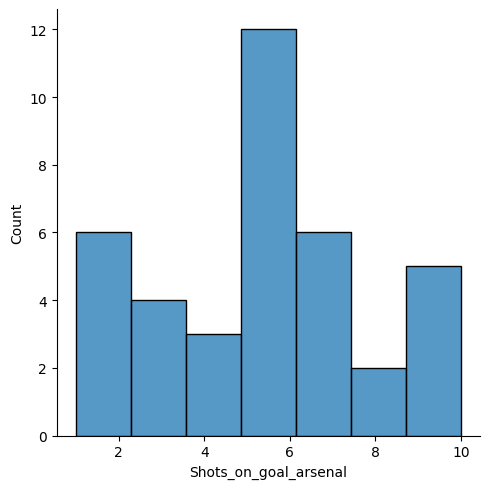

In [459]:
sns.displot(x='Shots_on_goal_arsenal',data=arsenal_matches_stats)

In [460]:
arsenal_matches_stats['Shots_on_goal_arsenal'].mean()

5.368421052631579

In [461]:
import plotly.express as px

# Plot the goals scored throughout the season
fig = px.bar(arsenal_matches_stats, x='fixture.date', y='Shots_on_goal_arsenal', title='Shots on Goal throught the season')
fig.update_xaxes(title='Date')
fig.update_yaxes(title='Goals Scored')

fig.show()


In [467]:
arsenal_matches_stats

,fixture.id,fixture.date,teams.home.id,teams.home.name,teams.away.id,teams.away.name,goals.home,goals.away,Shots on Goal_home,Total Shots_home,...,Ball Possession_away,Yellow Cards_away,Red Cards_away,Goalkeeper Saves_away,Total passes_away,Passes accurate_away,Passes %_away,arsenal_win,goals_scored,Shots_on_goal_arsenal
0,867946,2022-08-05,52,Crystal Palace,42,Arsenal,0,2,2.0,10,...,44%,2.0,NaN,2.0,438,360,82%,True,2,2
1,867956,2022-08-13,42,Arsenal,46,Leicester,4,2,7.0,19,...,50%,1.0,NaN,4.0,472,383,81%,True,4,7
2,867966,2022-08-20,35,Bournemouth,42,Arsenal,0,3,1.0,6,...,58%,1.0,NaN,1.0,580,517,89%,True,3,6
3,867976,2022-08-27,42,Arsenal,36,Fulham,2,1,8.0,22,...,28%,3.0,NaN,6.0,223,138,62%,True,2,8
4,867987,2022-08-31,42,Arsenal,66,Aston Villa,2,1,9.0,22,...,41%,3.0,NaN,6.0,352,271,77%,True,2,9
5,868001,2022-09-04,33,Manchester United,42,Arsenal,3,1,6.0,10,...,60%,3.0,NaN,3.0,465,388,83%,False,1,3
6,868007,2023-03-01,42,Arsenal,45,Everton,4,0,5.0,15,...,27%,2.0,NaN,1.0,274,185,68%,True,4,5
7,868017,2022-09-18,55,Brentford,42,Arsenal,0,3,2.0,5,...,64%,2.0,NaN,2.0,592,509,86%,True,3,7
8,868027,2022-10-01,42,Arsenal,47,Tottenham,3,1,9.0,22,...,35%,1.0,1.0,6.0,307,240,78%,True,3,9
9,868037,2022-10-09,42,Arsenal,40,Liverpool,3,2,7.0,11,...,56%,2.0,NaN,4.0,488,395,81%,True,3,7


In [468]:
arsenal_matches_stats['Yellow_cards_arsenal'] = 0  

home_condition = (arsenal_matches_stats['teams.home.name'] == 'Arsenal') & (arsenal_matches_stats['Yellow Cards_home'] >= 0)
arsenal_matches_stats.loc[home_condition, 'Yellow_cards_arsenal'] = arsenal_matches_stats.loc[home_condition, 'Yellow Cards_home']

away_condition = (arsenal_matches_stats['teams.away.name'] == 'Arsenal') & (arsenal_matches_stats['Yellow Cards_away'] >= 0)
arsenal_matches_stats.loc[away_condition, 'Yellow_cards_arsenal'] = arsenal_matches_stats.loc[away_condition, 'Yellow Cards_away']


In [469]:
arsenal_matches_stats


,fixture.id,fixture.date,teams.home.id,teams.home.name,teams.away.id,teams.away.name,goals.home,goals.away,Shots on Goal_home,Total Shots_home,...,Yellow Cards_away,Red Cards_away,Goalkeeper Saves_away,Total passes_away,Passes accurate_away,Passes %_away,arsenal_win,goals_scored,Shots_on_goal_arsenal,Yellow_cards_arsenal
0,867946,2022-08-05,52,Crystal Palace,42,Arsenal,0,2,2.0,10,...,2.0,NaN,2.0,438,360,82%,True,2,2,2
1,867956,2022-08-13,42,Arsenal,46,Leicester,4,2,7.0,19,...,1.0,NaN,4.0,472,383,81%,True,4,7,1
2,867966,2022-08-20,35,Bournemouth,42,Arsenal,0,3,1.0,6,...,1.0,NaN,1.0,580,517,89%,True,3,6,1
3,867976,2022-08-27,42,Arsenal,36,Fulham,2,1,8.0,22,...,3.0,NaN,6.0,223,138,62%,True,2,8,2
4,867987,2022-08-31,42,Arsenal,66,Aston Villa,2,1,9.0,22,...,3.0,NaN,6.0,352,271,77%,True,2,9,2
5,868001,2022-09-04,33,Manchester United,42,Arsenal,3,1,6.0,10,...,3.0,NaN,3.0,465,388,83%,False,1,3,3
6,868007,2023-03-01,42,Arsenal,45,Everton,4,0,5.0,15,...,2.0,NaN,1.0,274,185,68%,True,4,5,0
7,868017,2022-09-18,55,Brentford,42,Arsenal,0,3,2.0,5,...,2.0,NaN,2.0,592,509,86%,True,3,7,2
8,868027,2022-10-01,42,Arsenal,47,Tottenham,3,1,9.0,22,...,1.0,1.0,6.0,307,240,78%,True,3,9,2
9,868037,2022-10-09,42,Arsenal,40,Liverpool,3,2,7.0,11,...,2.0,NaN,4.0,488,395,81%,True,3,7,1


In [473]:
import plotly.express as px

# Plot the goals scored throughout the season
fig = px.bar(arsenal_matches_stats, x='fixture.date', y='Yellow_cards_arsenal', title='Yellow Cards throught the season')
fig.update_xaxes(title='Date')
fig.update_yaxes(title='Goals Scored')

fig.show()
